Shape of training data: (80820, 100, 100)
Data type: <class 'numpy.ndarray'>


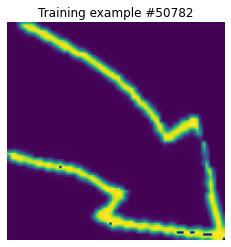

AttributeError: 'vaporwaveDataset' object has no attribute 'ims'

In [13]:
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as T
import torch
import torch.nn as nn
from torchvision.utils import make_grid
from torchvision.utils import save_image
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline


def show_images(images, nmax=64):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(make_grid((images.detach()[:nmax]), nrow=8).permute(1, 2, 0))
def show_batch(dl, nmax=64):
    for images in dl:
        show_images(images, nmax)
        break

image_size = 64
DATA_DIR = '../data/generator/generated_data.npy'
X_train = np.load(DATA_DIR)
Y_train = np.load("../data/generator/generated_data_labels.npy")
print(f"Shape of training data: {X_train.shape}")
print(f"Data type: {type(X_train)}")


data = X_train.astype(np.float64)
data = 255 * data
img = data.astype(np.uint8)
X_train = img

random_image = random.randint(0, len(X_train))
plt.imshow(X_train[random_image])
plt.title(f"Training example #{random_image}")
plt.axis('off')
plt.show()

class vaporwaveDataset(Dataset):

    def __init__(self, X, y):
            'Initialization'
            self.X = X
            self.y = y

    def __len__(self):
        'Denotes the total number of samples'
        return len(self.X)

    def __getitem__(self, index):
        'Generates one sample of data'
        # Select sample
        image = self.X[index]
        X = self.transform(image)
        return X

    transform = T.Compose([
        T.ToPILImage(),
        #T.CenterCrop(0.75 * 64),
        T.Resize(image_size),
        #T.RandomResizedCrop(image_size),
        #T.RandomHorizontalFlip(),
        T.ToTensor()])

batch_size = 64
cropped_dataset = vaporwaveDataset(X_train, Y_train)
train_dl = DataLoader(cropped_dataset, batch_size, shuffle=True, num_workers=3, pin_memory=True)
show_batch(train_dl)

In [ ]:
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as T
import torch
import torch.nn as nn
from torchvision.utils import make_grid
from torchvision.utils import save_image
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline


image_size = 64
DATA_DIR = '../data/generator/generated_data.npy'
X_train = np.load(DATA_DIR)
print(f"Shape of training data: {X_train.shape}")
print(f"Data type: {type(X_train)}")
data = X_train.astype(np.float64)
data = 255 * data
img = data.astype(np.uint8)
X_train = img


class croppedDataset(Dataset):
    'Characterizes a dataset for PyTorch'
    def __init__(self, ims):
        'Initialization'
        self.ims = ims

    def __len__(self):
            'Denotes the total number of samples'
            return len(self.ims)

    def __getitem__(self, index):
            'Generates one sample of data'
            # Select sample
            image = self.ims[index]
            X = self.transform(image)
            return X

    transform = T.Compose([
        T.ToPILImage(),
        T.CenterCrop(0.75 * 64),
        T.Resize(image_size),
        #T.RandomResizedCrop(image_size),
        T.RandomHorizontalFlip(),
        T.ToTensor()])

batch_size = 64
cropped_dataset = croppedDataset(ims=X_train)
train_dl = DataLoader(cropped_dataset, batch_size, shuffle=True, num_workers=3, pin_memory=True)
show_batch(train_dl)

Shape of training data: (80820, 100, 100)
Data type: <class 'numpy.ndarray'>
